>># **PROJET : Classifiez automatiquement des biens de consommation**

>>>Source du jeu de données : https://rapidapi.com/edamam/api/edamam-food-and-grocery-database

#  -> **Récupération, Filtrage et Affichage d'Images de Produits Alimentaires via une API**  

>>>>>> # **TRAITE :**

# **Importation des bibliothèques nécessaires**

In [ ]:
import os
import requests
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import BytesIO
from google.colab import drive
from IPython.display import display

# **Charger les données**

In [ ]:
# Faire monter le Google Drive dans Google Colab
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


> ## **Fichier**

>> ### Interagit avec une API pour récupérer des données sur les produits alimentaires.

In [ ]:
# Définition de l'URL de l'API
url = "https://edamam-food-and-grocery-database.p.rapidapi.com/api/food-database/v2/parser"

In [ ]:
# Paramètres de requête pour l'API
querystring = {
    "ingr": "champagne",
    "category[0]": "Categories",
}

In [ ]:
# En-têtes requis pour l'API
headers = {
    "X-RapidAPI-Key": "caeab9a9d0mshcfdb9b2d252d41ep162801jsna15c69bf96bf",
    "X-RapidAPI-Host": "edamam-food-and-grocery-database.p.rapidapi.com"
}

> Effectuer une requête HTTP GET vers l'API

In [ ]:
# Obtention des données de l'API
response = requests.get(url, headers=headers, params=querystring)
data = response.json()

>> ### Filtrage des produits ayant une image associée

In [ ]:
products = data.get("hints", [])

In [ ]:
product_info = []
for product in products:
    food = product.get("food", {})
    food_id = food.get("foodId")
    label = food.get("label")
    category = food.get("category")
    image_relative_url = food.get("image")
    image_full_url = f"https://www.edamam.com{image_relative_url}"  # Construct full image URL
    food_contents_label = food.get("foodContentsLabel", "")
    product_info.append({"foodId": food_id, "label": label, "category": category, "foodContentsLabel": food_contents_label, "image": image_full_url})

>> ### Le DataFrame

>> Création

In [ ]:
df_champagne_data = pd.DataFrame(product_info)

>> Affichage des premières lignes

In [ ]:
df_champagne_data.head()

,foodId,label,category,foodContentsLabel,image
0,food_a656mk2a5dmqb2adiamu6beihduu,Champagne,Generic foods,,https://www.edamam.comhttps://www.edamam.com/f...
1,food_b753ithamdb8psbt0w2k9aquo06c,"Champagne Vinaigrette, Champagne",Packaged foods,OLIVE OIL; BALSAMIC VINEGAR; CHAMPAGNE VINEGAR...,https://www.edamam.comNone
2,food_b3dyababjo54xobm6r8jzbghjgqe,"Champagne Vinaigrette, Champagne",Packaged foods,INGREDIENTS: WATER; CANOLA OIL; CHAMPAGNE VINE...,https://www.edamam.comhttps://www.edamam.com/f...
3,food_a9e0ghsamvoc45bwa2ybsa3gken9,"Champagne Vinaigrette, Champagne",Packaged foods,CANOLA AND SOYBEAN OIL; WHITE WINE (CONTAINS S...,https://www.edamam.comNone
4,food_an4jjueaucpus2a3u1ni8auhe7q9,"Champagne Vinaigrette, Champagne",Packaged foods,WATER; CANOLA AND SOYBEAN OIL; WHITE WINE (CON...,https://www.edamam.comNone


>> Exploration

In [ ]:
df_champagne_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   foodId             20 non-null     object
 1   label              20 non-null     object
 2   category           20 non-null     object
 3   foodContentsLabel  20 non-null     object
 4   image              20 non-null     object
dtypes: object(5)
memory usage: 928.0+ bytes


In [ ]:
df_champagne_data.foodContentsLabel.unique()

array(['',
       'OLIVE OIL; BALSAMIC VINEGAR; CHAMPAGNE VINEGAR; GARLIC; DIJON MUSTARD; SEA SALT.',
       'INGREDIENTS: WATER; CANOLA OIL; CHAMPAGNE VINEGAR; SUGAR; OLIVE OIL; SALT; DRIED GARLIC; DRED SHALLOTS; BLACK PEPPER; XANTHAN GUM; SPICE',
       'CANOLA AND SOYBEAN OIL; WHITE WINE (CONTAINS SULFITES); WATER; VINEGARS (CHAMPAGNE AND WHITE WINE); SUGAR; SALT; MUSTARD SEED; MONOSODIUM GLUTAMATE; GARLIC*; ONION*; SPICE; XANTHAN GUM; MOLASSES; CALCIUM DISODIUM EDTA ADDED TO PROTECT FLAVOR; CHIVES*; TAMARIND; NATURAL FLAVOR.',
       'WATER; CANOLA AND SOYBEAN OIL; WHITE WINE (CONTAINS SULFITES); VINEGARS (CHAMPAGNE AND WHITE WINE); SUGAR; SALT; MUSTARD SEED; MONOSODIUM GLUTAMATE; GARLIC*; ONION*; SPICE; XANTHAN GUM; POTASSIUM SORBATE ADDED TO MAINTAIN FRESHNESS; MOLASSES; CALCIUM DISODIUM EDTA ADDED TO PROTECT FLAVOR; CHIVES*; TAMARIND.',
       'SOYBEAN OIL; WHITE WINE (PRESERVED WITH SULFITES); WATER; WHITE WINE VINEGAR; SUGAR; SALT; SPICES (INCLUDING MUSTARD SEED); MONOSODIUM G

In [ ]:
df_champagne_data.label.unique()

array(['Champagne', 'Champagne Vinaigrette, Champagne',
       'Champagne Dressing, Champagne', 'Champagne Buttercream',
       'Champagne Sorbet', 'Champagne Truffles', 'Champagne Vinaigrette',
       'Champagne Chicken', 'Strawberry Champagne', 'Champagne Jelly',
       'Champagne Punch', 'Champagne Sangria',
       'Champagne Cotton Candy, Champagne',
       'Champagne Simply Dressed Vinaigrette, Champagne',
       'Champagne Cake', 'Champagne Cupcakes', 'Champagne Vinegar'],
      dtype=object)

> ## Images

In [ ]:
df_champagne_data.image

0     https://www.edamam.comhttps://www.edamam.com/f...
1                            https://www.edamam.comNone
2     https://www.edamam.comhttps://www.edamam.com/f...
3                            https://www.edamam.comNone
4                            https://www.edamam.comNone
5     https://www.edamam.comhttps://www.edamam.com/f...
6                            https://www.edamam.comNone
7                            https://www.edamam.comNone
8                            https://www.edamam.comNone
9                            https://www.edamam.comNone
10                           https://www.edamam.comNone
11                           https://www.edamam.comNone
12                           https://www.edamam.comNone
13                           https://www.edamam.comNone
14                           https://www.edamam.comNone
15                           https://www.edamam.comNone
16    https://www.edamam.comhttps://www.edamam.com/f...
17                           https://www.edamam.

In [ ]:
# Installation de la bibliothèque Pillow (PIL)
%pip install pillow

> Le chemin vers le dossier de stockage des images

In [ ]:
folder_path = "/content/drive/MyDrive/rapid_API_image/images/"

> Téléchargement et stockage des images dans le dossier spécifié

In [ ]:
# Créez un dossier s'il n'existe pas
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Téléchargement et stockage des images dans le dossier spécifié
for product in products:
    food = product.get("food", {})
    image_url = food.get("image")

    if image_url:
        image_response = requests.get(image_url)
        if image_response.status_code == 200:
            image = Image.open(BytesIO(image_response.content))
            # Conversion de l'image en mode RVB en supprimant le canal alpha
            rgb_image = image.convert("RGB")

            image_filename = os.path.join(folder_path, f"{food['foodId']}.jpg")
            rgb_image.save(image_filename)
            print(f"Image saved: {image_filename}")
        else:
            print(f"Image download failed for: {food['foodId']}")
    else:
        print(f"No image URL available for: {food['foodId']}")

Image saved: /content/drive/MyDrive/rapid_API_image/images/food_a656mk2a5dmqb2adiamu6beihduu.jpg
No image URL available for: food_b753ithamdb8psbt0w2k9aquo06c
Image saved: /content/drive/MyDrive/rapid_API_image/images/food_b3dyababjo54xobm6r8jzbghjgqe.jpg
No image URL available for: food_a9e0ghsamvoc45bwa2ybsa3gken9
No image URL available for: food_an4jjueaucpus2a3u1ni8auhe7q9
Image saved: /content/drive/MyDrive/rapid_API_image/images/food_bmu5dmkazwuvpaa5prh1daa8jxs0.jpg
No image URL available for: food_alpl44taoyv11ra0lic1qa8xculi
No image URL available for: food_byap67hab6evc3a0f9w1oag3s0qf
No image URL available for: food_am5egz6aq3fpjlaf8xpkdbc2asis
No image URL available for: food_bcz8rhiajk1fuva0vkfmeakbouc0
No image URL available for: food_a79xmnya6togreaeukbroa0thhh0
No image URL available for: food_aoxaf73b3o0igebpj6wjga6kqhco
No image URL available for: food_ax1n26waalpd9cbc64bjob7pw6hg
No image URL available for: food_b4va8u0bb6pf74akh2rtcb3llna9
No image URL available for:

> le nombre d'images téléchargées

In [ ]:
num_images = len(os.listdir(folder_path))
print(f"Nombre total d'images téléchargées : {num_images}")

Nombre total d'images téléchargées : 4


>> ### Affichage

>>> #### Affichage de la première image

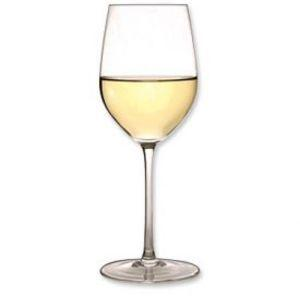

In [ ]:
# Affichage de la première image
if num_images > 0:
    first_image_filename = os.listdir(folder_path)[0]
    first_image_path = os.path.join(folder_path, first_image_filename)

    first_image = Image.open(first_image_path)
    display(first_image)
else:
    print("Aucune image disponible.")

>>> #### Affichage les premières images

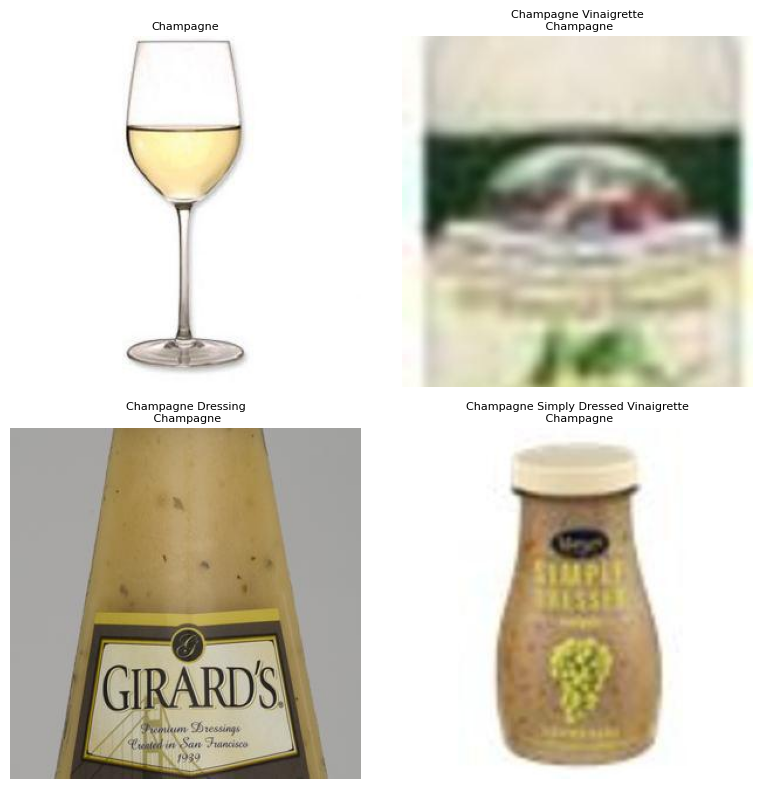

In [ ]:
# Liste des noms de fichiers des images téléchargées
image_filenames = os.listdir(folder_path)[:num_images]  # Utilisation de num_images

# Récupération des labels associés aux noms de fichiers
image_labels = []
for filename in image_filenames:
    food_id = filename.split('.')[0]
    label = df_champagne_data[df_champagne_data['foodId'] == food_id]['label'].values[0]
    image_labels.append(label)

# Affichage des images avec les labels en deux lignes
fig, axes = plt.subplots(2, 2, figsize=(8, 8))  # Grille 2x2
for i, (filename, label) in enumerate(zip(image_filenames, image_labels)):
    row = i // 2  # Utilisation d'une grille 2x2
    col = i % 2   # Utilisation d'une grille 2x2
    image_path = os.path.join(folder_path, filename)
    image = Image.open(image_path)
    axes[row, col].imshow(image)
    axes[row, col].set_title('\n'.join(label.split(',')), fontsize=8, pad=5)
    axes[row, col].axis("off")  # Turn off axis

plt.tight_layout()
plt.show()


# **Extraction et enregistrement** des 10 premiers produits dans un fichier “.csv”

In [ ]:
df_champagne_data.head(10).to_csv('first_10_champagne.csv', index=False)

In [ ]:
df_champagne_data = pd.read_csv('first_10_champagne.csv')

In [ ]:
df_champagne_data

,foodId,label,category,foodContentsLabel,image
0,food_a656mk2a5dmqb2adiamu6beihduu,Champagne,Generic foods,NaN,https://www.edamam.comhttps://www.edamam.com/f...
1,food_b753ithamdb8psbt0w2k9aquo06c,"Champagne Vinaigrette, Champagne",Packaged foods,OLIVE OIL; BALSAMIC VINEGAR; CHAMPAGNE VINEGAR...,https://www.edamam.comNone
2,food_b3dyababjo54xobm6r8jzbghjgqe,"Champagne Vinaigrette, Champagne",Packaged foods,INGREDIENTS: WATER; CANOLA OIL; CHAMPAGNE VINE...,https://www.edamam.comhttps://www.edamam.com/f...
3,food_a9e0ghsamvoc45bwa2ybsa3gken9,"Champagne Vinaigrette, Champagne",Packaged foods,CANOLA AND SOYBEAN OIL; WHITE WINE (CONTAINS S...,https://www.edamam.comNone
4,food_an4jjueaucpus2a3u1ni8auhe7q9,"Champagne Vinaigrette, Champagne",Packaged foods,WATER; CANOLA AND SOYBEAN OIL; WHITE WINE (CON...,https://www.edamam.comNone
5,food_bmu5dmkazwuvpaa5prh1daa8jxs0,"Champagne Dressing, Champagne",Packaged foods,SOYBEAN OIL; WHITE WINE (PRESERVED WITH SULFIT...,https://www.edamam.comhttps://www.edamam.com/f...
6,food_alpl44taoyv11ra0lic1qa8xculi,Champagne Buttercream,Generic meals,sugar; butter; shortening; vanilla; champagne;...,https://www.edamam.comNone
7,food_byap67hab6evc3a0f9w1oag3s0qf,Champagne Sorbet,Generic meals,Sugar; Lemon juice; brandy; Champagne; Peach,https://www.edamam.comNone
8,food_am5egz6aq3fpjlaf8xpkdbc2asis,Champagne Truffles,Generic meals,butter; cocoa; sweetened condensed milk; vanil...,https://www.edamam.comNone
9,food_bcz8rhiajk1fuva0vkfmeakbouc0,Champagne Vinaigrette,Generic meals,champagne vinegar; olive oil; Dijon mustard; s...,https://www.edamam.comNone
